In [1]:
import numpy as np
from matplotlib import pyplot as plt

#the following will allow you to load loadDataFRP.py regardless of where you are running your notebook or script
import sys
sys.path.append('/ocean/eolson/MEOPAR/analysis-elise/notebooks/databases/')

import loadDataFRP as LD

%matplotlib inline

## Load the Fraser River Plume CTD data
    - stationdata is a pandas dataframe containing the station coordinates and some surface data including ALS bottle samples
    - casts is 

In [2]:
stationdata, casts = LD.loadDataFRP()

In [3]:
stationdata.keys()

Index(['Station', 'Date', 'LatDecDeg', 'LonDecDeg', 'LatDecDeg_surface',
       'LonDecDeg_surface', 'LatDecDeg_bottom', 'LonDecDeg_bottom',
       'LatDecDeg_surf2', 'LonDecDeg_surf2', 'LatDecDeg_Niskin',
       'LonDecDeg_Niskin', 'LatDecDeg_end', 'LonDecDeg_end', 'Sounding',
       'MaxWireOut_m', 'waveHeightEst_m', 'cloudyPct', 'filename',
       'time_on_PDT_hhmmss', 'time_on_PDT_decDay', 'time_surface_PDT_hhmmss',
       'time_surface_PDT_decDay', 'time_bottom_PDT_hhmmss',
       'time_bottom_PDT_decDay', 'time_surf2_PDT_hhmmss',
       'time_Niskin_PDT_hhmmss', 'time_off_PDT_hhmmss', 'SecchiDepth_m',
       'BottleLetter', 'ALS_Turb_NTU', 'ALS_TSS_mgL', 'sb19Turb_uncorrected',
       'sb19Sal', 'sb25Sal', 'ishift_sub19', 'pStart25', 'pEnd25'],
      dtype='object')

In [4]:
stationdata[['Station','Date','LatDecDeg','LonDecDeg','ALS_Turb_NTU','ALS_TSS_mgL','sb19Turb_uncorrected']]

,Station,Date,LatDecDeg,LonDecDeg,ALS_Turb_NTU,ALS_TSS_mgL,sb19Turb_uncorrected
0,1.0,20170410,49.148333,-123.040000,NaN,NaN,770.1800
1,2.0,20170410,49.148333,-123.040000,25.40,32.5,745.4985
2,3.0,20170410,49.099983,-123.526600,2.40,8.9,54.0550
3,4.0,20170410,49.100383,-123.467017,2.54,12.2,66.1860
4,5.0,20170410,49.100583,-123.400417,8.28,18.9,264.7250
5,6.0,20170410,49.100500,-123.375500,NaN,NaN,270.8475
6,7.0,20170410,49.100000,-123.350000,8.60,15.7,245.6130
7,8.0,20170410,49.100333,-123.324667,NaN,NaN,255.7415
8,9.0,20170410,49.101500,-123.309000,9.36,21.8,308.4425
9,10.0,20170531,49.039500,-123.259650,NaN,NaN,319.6190


## Turbidity correction
The sb19 turbidity sensor produced values approximately a factor of around 30 times too high. Therefore, they must be corrected in order to be comparable with other measurements. The correction is done by linear regression of the surface sb19 turbidity values against the bottle turbidity values, forcing the fit line through the origin. This correction is applied to the data loaded as casts (described next).

slope: [ 32.88927286]


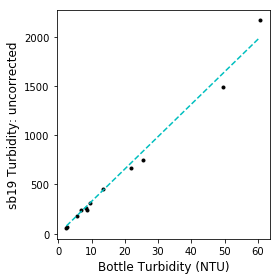

In [5]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.plot(stationdata['ALS_Turb_NTU'].values,stationdata['sb19Turb_uncorrected'].values,'k.');
ax.set_xlabel('Bottle Turbidity (NTU)',size=12)
ax.set_ylabel('sb19 Turbidity: uncorrected',size=12)
ts=np.arange(stationdata['ALS_Turb_NTU'].min(),stationdata['ALS_Turb_NTU'].max())
plt.tight_layout()

x=stationdata.loc[stationdata.ALS_Turb_NTU>0]['ALS_Turb_NTU'].values
x=x[:,np.newaxis]
a1=np.linalg.lstsq(x,stationdata.loc[stationdata.ALS_Turb_NTU>0]['sb19Turb_uncorrected'])[0]

print('slope:',a1)
ax.plot(ts,a1*ts,'c--');
#ax.set_xlim(8.05,8.1)
#ax.set_ylim(240,241)
FTUtoNTU=a1[0]

## Casts dictionary
Casts contains a dictionary in which each key is a station identifier. The objects associated with these keys contain upcasts and downcasts for each station as pandas dataframes, which can be accessed with the following syntax:  
   - upcast: **casts[station ID].uCast**  
   - downcasts: **casts[station ID].dCast**  
where station ID is the station number.


Station 14 is separated into 14.1: downcasts and 14.2: upcast because the downcast and upcast passed through different sides of a turbidity front and therefore are associated with separate Secchi disk measurements. Therefore, **casts[14.1].uCast** and **casts[14.2].dCast** return pandas dataframes containing only NaN values. 

Each cast dataframe contains the following columns:
    -  prSM 	   pressure (dbar)
    -  gsw_ctA0    conservative temperature (C)
    -  gsw_srA0    reference salinity (g/kg) 
    -  xmiss       beam transmission (%)
    -  par         PAR/Irradiance 
    -  wetStar     fluorescence (mg/m^3)
    -  sbeox0ML_L  oxygen (ml/l)
    -  turb        NTU (corrected by comparison with bottle samples)
    Note: no salinity correction is currently available for this coastal region; the output of the TEOS10 absolute salinity field is identical to the reference salinity field

In [6]:
casts

{1.0: <loadDataFRP.zCast at 0x7f80cd66c978>,
 2.0: <loadDataFRP.zCast at 0x7f8098f02240>,
 3.0: <loadDataFRP.zCast at 0x7f8098f52860>,
 4.0: <loadDataFRP.zCast at 0x7f8098ee51d0>,
 5.0: <loadDataFRP.zCast at 0x7f8098f52278>,
 6.0: <loadDataFRP.zCast at 0x7f8098ee55c0>,
 7.0: <loadDataFRP.zCast at 0x7f8098f52710>,
 8.0: <loadDataFRP.zCast at 0x7f8098ee5438>,
 9.0: <loadDataFRP.zCast at 0x7f8098ee5f28>,
 10.0: <loadDataFRP.zCast at 0x7f8098f52ac8>,
 11.0: <loadDataFRP.zCast at 0x7f8098f02470>,
 12.0: <loadDataFRP.zCast at 0x7f8098ee5710>,
 13.0: <loadDataFRP.zCast at 0x7f8098f02278>,
 14.1: <loadDataFRP.zCast at 0x7f8098f19080>,
 14.199999999999999: <loadDataFRP.zCast at 0x7f8098f02780>,
 15.0: <loadDataFRP.zCast at 0x7f8098f19358>,
 16.0: <loadDataFRP.zCast at 0x7f8098f02630>,
 17.0: <loadDataFRP.zCast at 0x7f8098f19240>,
 18.0: <loadDataFRP.zCast at 0x7f8098f19d30>}

In [7]:
casts[1].uCast

,prSM,gsw_ctA0,gsw_srA0,xmiss,par,wetStar,sbeox0ML_L,turb
0,1.0,6.306362,0.378850,2.932043,2.236695e+01,NaN,NaN,20.796180
1,2.0,6.310249,0.441165,2.934966,1.575302e+00,NaN,NaN,21.073669
2,3.0,6.316313,0.534918,2.945193,1.280958e-01,NaN,NaN,21.184978
3,4.0,6.320081,0.611985,3.032310,5.031213e-03,NaN,NaN,21.146414
4,5.0,6.322921,0.661319,3.033075,5.605485e-05,NaN,NaN,21.053533
5,6.0,6.325707,0.708888,3.037211,6.894603e-07,NaN,NaN,21.088590
6,7.0,6.330148,0.759324,3.016734,1.526496e-08,NaN,NaN,21.190422
7,8.0,6.343009,0.934182,2.863257,4.787687e-10,NaN,NaN,21.510165
8,9.0,6.353453,1.145314,2.842351,3.901169e-12,NaN,NaN,21.479061
9,10.0,6.360641,1.273424,2.799797,1.490007e-12,NaN,NaN,21.926239


In [8]:
casts[1].dCast

,prSM,gsw_ctA0,gsw_srA0,xmiss,par,wetStar,sbeox0ML_L,turb
0,1.0,6.278980,0.122307,2.583104,1.392400e+01,NaN,NaN,22.650823
1,2.0,6.296081,0.354459,2.942141,8.221710e-01,NaN,NaN,22.356268
2,3.0,6.303803,0.402262,3.008302,4.576268e-02,NaN,NaN,23.117667
3,4.0,6.292239,0.311284,2.822189,2.273428e-04,NaN,NaN,22.169142
4,5.0,6.308662,0.501821,3.080394,1.993756e-06,NaN,NaN,23.169033
5,6.0,6.308210,0.505996,3.181796,1.186555e-12,NaN,NaN,22.570955
6,7.0,6.319225,0.672474,3.169048,1.002109e-12,NaN,NaN,22.553989
7,8.0,6.325879,0.769612,3.170271,1.000000e-12,NaN,NaN,22.197794
8,9.0,6.342102,1.080486,3.218300,1.000000e-12,NaN,NaN,21.716764
9,10.0,6.347788,1.112810,3.270978,1.000000e-12,NaN,NaN,21.717460


In [9]:
casts[14.1].uCast

,prSM,gsw_ctA0,gsw_srA0,xmiss,par,wetStar,sbeox0ML_L,turb
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
casts[14.1].dCast.head()

,prSM,gsw_ctA0,gsw_srA0,xmiss,par,wetStar,sbeox0ML_L,turb
0,1.0,NaN,NaN,17.553925,237.592222,NaN,NaN,10.332835
1,2.0,14.634750,13.100889,32.541290,54.444779,2.974727,6.785857,7.031098
2,3.0,14.613810,14.204708,52.962820,19.241430,3.492479,6.787338,4.700267
3,4.0,14.603345,15.280848,64.355044,9.894168,4.225719,6.788524,2.718453
4,5.0,14.393989,18.290614,69.099788,6.059792,5.199905,6.531973,1.896656


In [11]:
casts[14.2].uCast.head()

,prSM,gsw_ctA0,gsw_srA0,xmiss,par,wetStar,sbeox0ML_L,turb
0,1.0,14.617333,14.090778,53.447829,433.515714,4.065889,6.721133,3.824349
1,2.0,14.559705,14.194016,56.445661,210.759727,4.571770,6.736225,3.666364
2,3.0,14.539185,15.393519,63.696976,96.642410,5.191962,6.709114,2.915158
3,4.0,14.488111,17.446019,73.533680,47.131519,4.971612,6.705952,1.980964
4,5.0,13.468943,20.857297,83.106563,25.952466,4.133853,6.598159,1.055213


In [12]:
casts[14.2].dCast

,prSM,gsw_ctA0,gsw_srA0,xmiss,par,wetStar,sbeox0ML_L,turb
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sample plot of turbidity and salinity vs depth (pressure)

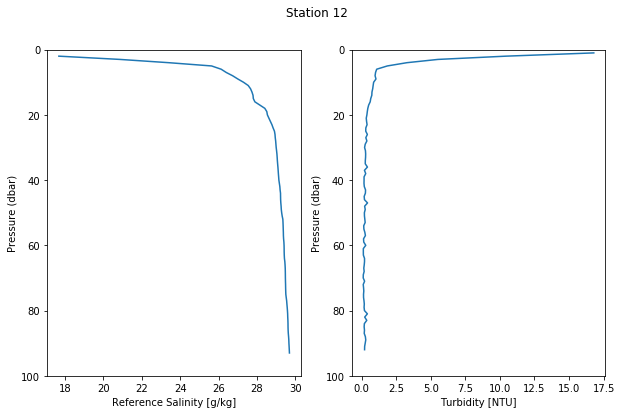

In [13]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
p1=ax[0].plot(casts[12].uCast['gsw_srA0'],casts[12].uCast['prSM'])
p1=ax[1].plot(casts[12].uCast['turb'],casts[12].uCast['prSM'])
ax[0].set_ylim((100,0))
ax[1].set_ylim((100,0))
fig.suptitle('Station 12')
ax[0].set_ylabel('Pressure (dbar)')
ax[1].set_ylabel('Pressure (dbar)')
ax[0].set_xlabel('Reference Salinity [g/kg]')
ax[1].set_xlabel('Turbidity [NTU]')